In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from keras.layers import BatchNormalization
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

In [ ]:
print(X_train[0].shape)
print(X_train.shape)

(28, 28)
(60000, 28, 28)


In [ ]:
X_train=X_train.reshape((X_train.shape[0],-1))
X_test=X_test.reshape((X_test.shape[0],-1))
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


In [ ]:
np.mean(X_train),np.std(X_train),np.mean(y_train),np.std(y_test)

(72.94035223214286, 90.02118235130519, 0.1, 0.29999998)

In [ ]:
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

In [ ]:
np.mean(X_train),np.std(X_train),np.mean(y_train),np.std(y_test)

(-1.8899470046408106e-18, 1.000000000000002, 0.1, 0.29999998)

#2. 
*   Design and implement a multi-class Perceptron classifier with four hidden layers:
*   Write a function that returns the MLP model [Base-line model: optimizer-SGD, activationsSigmoid].
*   Train the model for 5 epochs. [4 Marks] CO3-L4

BASIC MLP MODEL

In [ ]:
model = Sequential()
model.add(Dense(50, activation='sigmoid', input_dim=784))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                39250     
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 50)                2550      
                                                                 
 dense_9 (Dense)             (None, 50)                2550      
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dense_11 (Dense)            (None, 10)                510       
                                                                 
Total params: 49,960
Trainable params: 49,960
Non-trai

In [ ]:
sgd = optimizers.SGD(learning_rate = 0.01)    
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, batch_size = 32,validation_split=0.3, epochs = 5, verbose = 1)

Epoch 1/5
1313/1313 [==============================] - 5s 3ms/step - loss: 2.3082 - accuracy: 0.0995 - val_loss: 2.3023 - val_accuracy: 0.1044
Epoch 2/5
1313/1313 [==============================] - 3s 3ms/step - loss: 2.3030 - accuracy: 0.1008 - val_loss: 2.3032 - val_accuracy: 0.1561
Epoch 3/5
1313/1313 [==============================] - 4s 3ms/step - loss: 2.3025 - accuracy: 0.1037 - val_loss: 2.3027 - val_accuracy: 0.0976
Epoch 4/5
1313/1313 [==============================] - 3s 2ms/step - loss: 2.3021 - accuracy: 0.1055 - val_loss: 2.3021 - val_accuracy: 0.0971
Epoch 5/5
1313/1313 [==============================] - 4s 3ms/step - loss: 2.3017 - accuracy: 0.1074 - val_loss: 2.3005 - val_accuracy: 0.0999


a) Plot training accuracy, training loss, validation accuracy and validation loss in a single 
plot. Write inferences on the model fit (Under fit, Over fit or correct fit. Justify your 
observations) [2 marks]


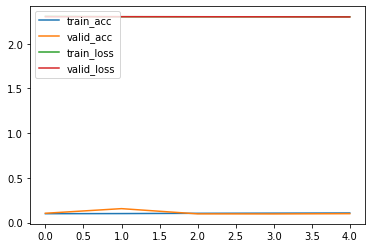

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_acc','valid_acc','train_loss','valid_loss'],loc='upper left')
plt.show()

THIS IS AN UNDERFITTING MODEL BECAUSE IT HAS POOR PERFORMNACE ON TRAINING DATA AND POOR GENERALIZATION ON TEST DATA AS .WELL

In [ ]:
results=model.evaluate(X_test,y_test)
print("Accuracy = {}%".format(results[1]*100))

313/313 [==============================] - 0s 1ms/step - loss: 2.3007 - accuracy: 0.1000
Accuracy = 10.000000149011612%


b) Display the confusion matrix and calculate overall accuracy, precision, recall and F1 
score on test data. Display class wise accuracy also. [3marks]


In [ ]:
print("Confusion Matrix: ",confusion_matrix([np.argmax(i) for i in y_test],[np.argmax(i) for i in model.predict(X_test)]))

Confusion Matrix:  [[   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]]


In [ ]:
c=classification_report([np.argmax(i) for i in y_test],[np.argmax(i) for i in model.predict(X_test)])
print("Report : ", c);

Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.10      1.00      0.18      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c) Display sample misclassified data with the predicted labels. Write your observations 
on the misclassified samples. [1 mark]
d) Take a new test image and predict the label [Get any image from internet]

In [ ]:
misclassified = np.where(y_test != model.predict(X_test))

In [ ]:
misclassified

(array([   0,    0,    0, ..., 9999, 9999, 9999]),
 array([0, 1, 2, ..., 7, 8, 9]))

#3


1.   Refine the baseline model in question 3 using different methods that we discussed in the 
class and update the model architecture (Do not add more hidden layers). Train the model 
for 5 epochs and compare with baseline model and give your inferences.



  

In [ ]:
def cal(multi):
    model=Sequential()
    model.add(Dense(50, input_shape = (784,),kernel_initializer=multi))     
    model.add(Activation('sigmoid'))

    model.add(Dense(50,kernel_initializer=multi))                     
    model.add(Activation('sigmoid'))

    model.add(Dense(50,kernel_initializer=multi))                         
    model.add(Activation('sigmoid'))

    model.add(Dense(50,kernel_initializer=multi))                         
    model.add(Activation('sigmoid'))

    model.add(Dense(50,kernel_initializer=multi))                         
    model.add(Activation('sigmoid'))

    model.add(Dense(10,kernel_initializer=multi))                        
    model.add(Activation('softmax'))
    sgd = optimizers.SGD(learning_rate = 0.01)   
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model
 

In [ ]:
model1=cal('he_normal')
history1=model1.fit(X_train, y_train, batch_size = 32, epochs = 5, verbose = 1)

model2=cal('he_uniform')
history2=model2.fit(X_train, y_train, batch_size = 32, epochs = 5, verbose = 1)

model3=cal('random_normal')
history3=model3.fit(X_train, y_train, batch_size = 32, epochs = 5, verbose = 1)

model4=cal('random_uniform')
history4=model4.fit(X_train, y_train, batch_size = 32, epochs = 5, verbose = 1)
model5=cal('truncated_normal')
history5=model5.fit(X_train, y_train, batch_size = 32, epochs = 5, verbose = 1)
model6=cal('zero')
history6=model6.fit(X_train, y_train, batch_size = 32, epochs = 5, verbose = 1)
model7=cal('one')
history7=model7.fit(X_train, y_train, batch_size = 32, epochs = 5, verbose = 1)
model8=cal('identity')
history8=model8.fit(X_train, y_train, batch_size = 32, epochs = 5, verbose = 1)
model9=cal('orthogonal')
history9=model9.fit(X_train, y_train, batch_size = 32, epochs = 5, verbose = 1)
model10=cal('glorot_normal')
history10=model10.fit(X_train, y_train, batch_size = 32, epochs = 5, verbose = 1)
model11=cal('glorot_uniform')
history11=model11.fit(X_train, y_train, batch_size = 32, epochs = 5, verbose = 1)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3037 - accuracy: 0.1063
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2967 - accuracy: 0.1275
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 2.2880 - accuracy: 0.1493
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2678 - accuracy: 0.2228
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1972 - accuracy: 0.3025
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3050 - accuracy: 0.1092
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2951 - accuracy: 0.1250
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2839 - accuracy: 0.1812
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2463 - accuracy: 0.2515
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 2.0386 - accura

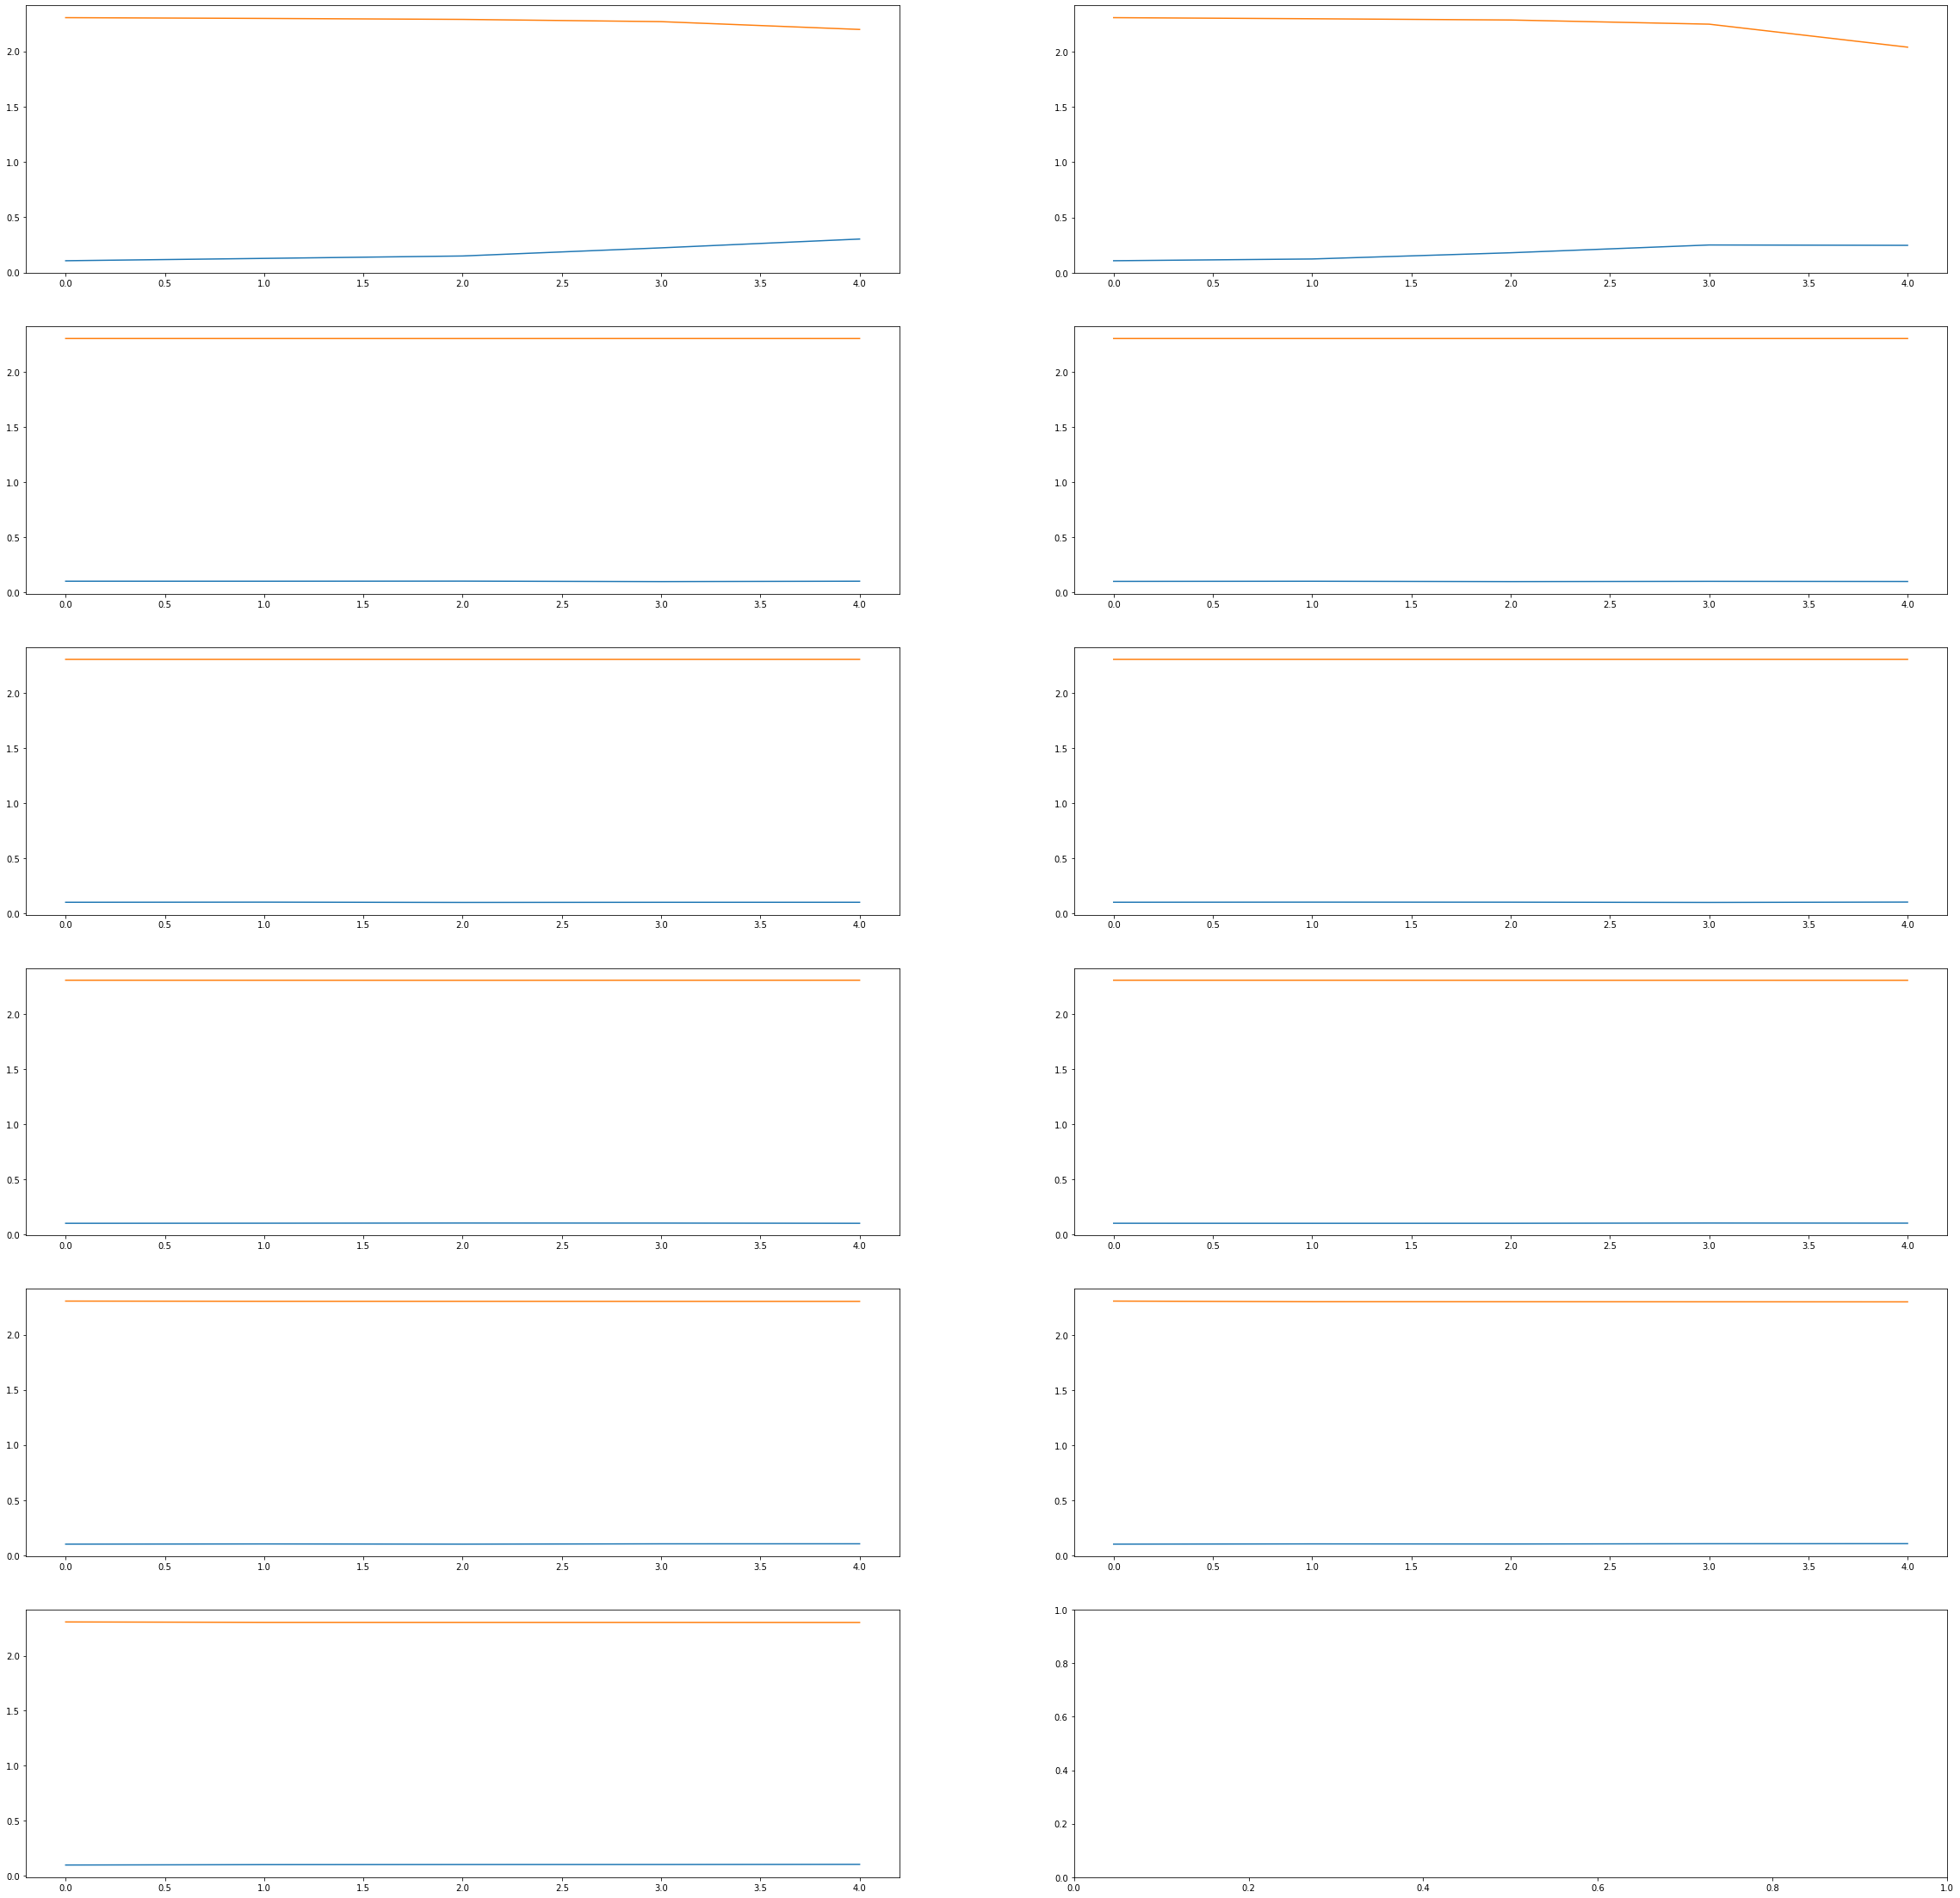

In [ ]:
fig1 ,ax1 = plt.subplots(nrows=6,ncols=2,figsize=(40,40))
ax1[0,0].plot(history1.history['accuracy'])
ax1[0,0].plot(history1.history['loss'])
ax1[0,1].plot(history2.history['accuracy'])
ax1[0,1].plot(history2.history['loss'])
ax1[1,0].plot(history3.history['accuracy'])
ax1[1,0].plot(history3.history['loss'])
ax1[1,1].plot(history4.history['accuracy'])
ax1[1,1].plot(history4.history['loss'])
ax1[2,0].plot(history5.history['accuracy'])
ax1[2,0].plot(history5.history['loss'])
ax1[2,1].plot(history6.history['accuracy'])
ax1[2,1].plot(history6.history['loss'])
ax1[3,0].plot(history7.history['accuracy'])
ax1[3,0].plot(history7.history['loss'])
ax1[3,1].plot(history8.history['accuracy'])
ax1[3,1].plot(history8.history['loss'])
ax1[4,0].plot(history9.history['accuracy'])
ax1[4,0].plot(history9.history['loss'])
ax1[4,1].plot(history10.history['accuracy'])
ax1[4,1].plot(history10.history['loss'])
ax1[5,0].plot(history11.history['accuracy'])
ax1[5,0].plot(history11.history['loss'])
plt.show(6,2)


In [ ]:
print("accuracy of he_normal initializer = {}%".format(model1.evaluate(X_test, y_test)[1]*100))
print("accuracy of he_uniform initializer = {}%".format(model2.evaluate(X_test, y_test)[1]*100))
print("accuracy of random_normal initializer = {}%".format(model3.evaluate(X_test, y_test)[1]*100))
print("accuracy of random_uniform initializer = {}%".format(model4.evaluate(X_test, y_test)[1]*100))
print("accuracy of truncated_normal initializer = {}%".format(model5.evaluate(X_test, y_test)[1]*100))
print("accuracy of one initializer = {}%".format(model7.evaluate(X_test, y_test)[1]*100))
print("accuracy of zero initializer = {}%".format(model6.evaluate(X_test, y_test)[1]*100))
print("accuracy of identity initializer = {}%".format(model8.evaluate(X_test, y_test)[1]*100))
print("accuracy of orthogonal initializer = {}%".format(model9.evaluate(X_test, y_test)[1]*100))
print("accuracy of glorot_normal initializer = {}%".format(model10.evaluate(X_test, y_test)[1]*100))
print("accuracy of glorot_uniform initializer = {}%".format(model11.evaluate(X_test, y_test)[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 2.1088 - accuracy: 0.3105
accuracy of he_normal initializer = 31.049999594688416%
313/313 [==============================] - 1s 2ms/step - loss: 1.8347 - accuracy: 0.2395
accuracy of he_uniform initializer = 23.95000010728836%
313/313 [==============================] - 1s 2ms/step - loss: 2.3032 - accuracy: 0.1000
accuracy of random_normal initializer = 10.000000149011612%
313/313 [==============================] - 1s 2ms/step - loss: 2.3032 - accuracy: 0.1000
accuracy of random_uniform initializer = 10.000000149011612%
313/313 [==============================] - 1s 2ms/step - loss: 2.3037 - accuracy: 0.1000
accuracy of truncated_normal initializer = 10.000000149011612%
313/313 [==============================] - 1s 3ms/step - loss: 2.3059 - accuracy: 0.1000
accuracy of one initializer = 10.000000149011612%
313/313 [==============================] - 1s 3ms/step - loss: 2.3032 - accuracy: 0.1000
accuracy of zero initializer = 

INFERENCE : he_normal initializer has got better accuracy

#ADD Relu activation function

In [ ]:
def cal():
    model=Sequential()
    model.add(Dense(50, input_shape = (784,),kernel_initializer='he_normal'))    
    model.add(Activation('relu'))
    model.add(Dense(50,kernel_initializer='he_normal'))                     
    model.add(Activation('relu'))
    model.add(Dense(50,kernel_initializer='he_normal'))                         
    model.add(Activation('relu'))
    model.add(Dense(50,kernel_initializer='he_normal'))                     
    model.add(Activation('relu'))
    model.add(Dense(50,kernel_initializer='he_normal'))                         
    model.add(Activation('relu'))
    model.add(Dense(10,kernel_initializer='he_normal'))                       
    model.add(Activation('softmax'))
    sgd = optimizers.SGD(learning_rate = 0.01)    
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model
model=cal()
history=model.fit(X_train, y_train, batch_size = 32,validation_split=0.3, epochs = 5, verbose = 1)

Epoch 1/5
1313/1313 [==============================] - 9s 6ms/step - loss: 0.6255 - accuracy: 0.7787 - val_loss: 0.4711 - val_accuracy: 0.8289
Epoch 2/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.4140 - accuracy: 0.8508 - val_loss: 0.4166 - val_accuracy: 0.8464
Epoch 3/5
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3637 - accuracy: 0.8680 - val_loss: 0.3967 - val_accuracy: 0.8541
Epoch 4/5
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3365 - accuracy: 0.8768 - val_loss: 0.3724 - val_accuracy: 0.8662
Epoch 5/5
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3136 - accuracy: 0.8854 - val_loss: 0.3712 - val_accuracy: 0.8643


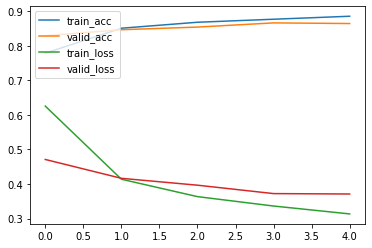

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_acc','valid_acc','train_loss','valid_loss'],loc='upper left')
plt.show()

In [ ]:
results=model.evaluate(X_test,y_test)
print("Accuracy = {}%".format(results[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.4044 - accuracy: 0.8581
Accuracy = 85.80999970436096%


#adagrad optimizer

In [ ]:
def cal():
    model=Sequential()
    model.add(Dense(50, input_shape = (784,),kernel_initializer='he_normal'))    
    model.add(Activation('relu'))
    model.add(Dense(50,kernel_initializer='he_normal'))                     
    model.add(Activation('relu'))
    model.add(Dense(50,kernel_initializer='he_normal'))                         
    model.add(Activation('relu'))
    model.add(Dense(50,kernel_initializer='he_normal'))                     
    model.add(Activation('relu'))
    model.add(Dense(50,kernel_initializer='he_normal'))                         
    model.add(Activation('relu'))
    model.add(Dense(10,kernel_initializer='he_normal'))                       
    model.add(Activation('softmax'))
    sgd = optimizers.Adagrad(learning_rate = 0.01)    
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model
model=cal()
history=model.fit(X_train, y_train, batch_size = 32,validation_split=0.3, epochs = 5, verbose = 1)

Epoch 1/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5411 - accuracy: 0.8033 - val_loss: 0.4289 - val_accuracy: 0.8440
Epoch 2/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3825 - accuracy: 0.8587 - val_loss: 0.3939 - val_accuracy: 0.8569
Epoch 3/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3382 - accuracy: 0.8766 - val_loss: 0.3704 - val_accuracy: 0.8674
Epoch 4/5
1313/1313 [==============================] - 5s 3ms/step - loss: 0.3130 - accuracy: 0.8847 - val_loss: 0.3684 - val_accuracy: 0.8721
Epoch 5/5
1313/1313 [==============================] - 5s 3ms/step - loss: 0.2951 - accuracy: 0.8920 - val_loss: 0.3566 - val_accuracy: 0.8725


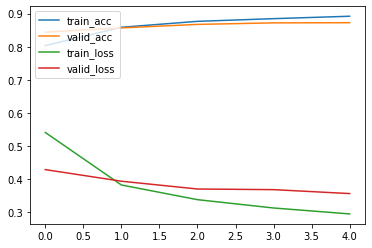

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_acc','valid_acc','train_loss','valid_loss'],loc='upper left')
plt.show()

In [ ]:
results=model.evaluate(X_test,y_test)
print("Accuracy = {}%".format(results[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.3848 - accuracy: 0.8632
Accuracy = 86.32000088691711%


#ADDING BATCH NORMALIZATION

In [ ]:
def cal():
    model=Sequential()
    model.add(Dense(50, input_shape = (784,))) 
    model.add(BatchNormalization())   
    model.add(Activation('relu'))

    model.add(Dense(50)) 
    model.add(BatchNormalization())                       
    model.add(Activation('relu'))

    model.add(Dense(50))  
    model.add(BatchNormalization())                          
    model.add(Activation('relu'))

    model.add(Dense(50)) 
    model.add(BatchNormalization())                       
    model.add(Activation('relu'))

    model.add(Dense(50))  
    model.add(BatchNormalization())                          
    model.add(Activation('relu'))
    
    model.add(Dense(10))  
    model.add(BatchNormalization())                        
    model.add(Activation('softmax'))
    sgd = optimizers.Adagrad(learning_rate = 0.01)    
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model
model=cal()
history=model.fit(X_train, y_train, batch_size = 32,validation_split=0.3, epochs = 5, verbose = 1)

Epoch 1/5
1313/1313 [==============================] - 8s 5ms/step - loss: 0.8275 - accuracy: 0.7641 - val_loss: 0.5305 - val_accuracy: 0.8429
Epoch 2/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.6172 - accuracy: 0.8199 - val_loss: 0.4649 - val_accuracy: 0.8565
Epoch 3/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.5617 - accuracy: 0.8332 - val_loss: 0.4325 - val_accuracy: 0.8657
Epoch 4/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.5257 - accuracy: 0.8418 - val_loss: 0.4156 - val_accuracy: 0.8679
Epoch 5/5
1313/1313 [==============================] - 7s 5ms/step - loss: 0.4994 - accuracy: 0.8467 - val_loss: 0.4016 - val_accuracy: 0.8708


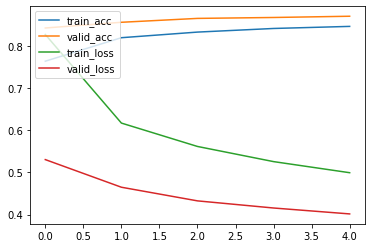

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_acc','valid_acc','train_loss','valid_loss'],loc='upper left')
plt.show()

In [ ]:
results=model.evaluate(X_test,y_test)
print("Accuracy = {}%".format(results[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.4306 - accuracy: 0.8590
Accuracy = 85.9000027179718%


#ADD dropout

In [ ]:
def cal():
    model=Sequential()
    model.add(Dense(50, input_shape = (784,)))  
    model.add(Activation('relu'))
    model.add(Dropout(0.2)) 

    model.add(Dense(50))                      
    model.add(Activation('relu'))
    model.add(Dropout(0.2)) 

    model.add(Dense(50))                          
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(50))                      
    model.add(Activation('relu'))
    model.add(Dropout(0.2)) 

    model.add(Dense(50))                          
    model.add(Activation('relu'))
    model.add(Dropout(0.2)) 
    
    model.add(Dense(10))                         
    model.add(Activation('softmax')) 
    sgd = optimizers.Adagrad(learning_rate = 0.01)    # stochastic gradient descent optimizer
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model
model=cal()
history=model.fit(X_train, y_train, batch_size = 32,validation_split=0.3, epochs = 5, verbose = 1)

Epoch 1/5
1313/1313 [==============================] - 6s 4ms/step - loss: 1.0455 - accuracy: 0.6162 - val_loss: 0.5615 - val_accuracy: 0.7967
Epoch 2/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.7012 - accuracy: 0.7477 - val_loss: 0.4923 - val_accuracy: 0.8258
Epoch 3/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.6253 - accuracy: 0.7812 - val_loss: 0.4671 - val_accuracy: 0.8382
Epoch 4/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5916 - accuracy: 0.7951 - val_loss: 0.4512 - val_accuracy: 0.8429
Epoch 5/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5606 - accuracy: 0.8066 - val_loss: 0.4318 - val_accuracy: 0.8493


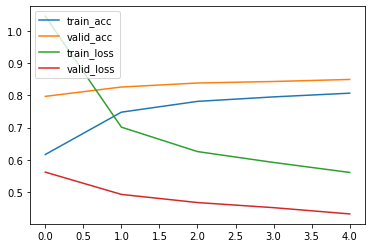

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_acc','valid_acc','train_loss','valid_loss'],loc='upper left')
plt.show()

In [ ]:
results=model.evaluate(X_test,y_test)
print("Accuracy = {}%".format(results[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.4637 - accuracy: 0.8360
Accuracy = 83.60000252723694%


#Early stoppinng

In [ ]:
import tensorflow as tf

In [ ]:
callback=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)

In [ ]:
def cal():
    model=Sequential()
    model.add(Dense(50, input_shape = (784,)))  
    model.add(Activation('relu'))
    model.add(Dropout(0.2)) 

    model.add(Dense(50))                      
    model.add(Activation('relu'))
    model.add(Dropout(0.2)) 

    model.add(Dense(50))                          
    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    model.add(Dense(50))                      
    model.add(Activation('relu'))
    model.add(Dropout(0.2)) 

    model.add(Dense(50))                          
    model.add(Activation('relu'))
    model.add(Dropout(0.2)) 
    
    model.add(Dense(10))                         
    model.add(Activation('softmax')) 
    sgd = optimizers.Adagrad(learning_rate = 0.01)    # stochastic gradient descent optimizer
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model
model=cal()
history=model.fit(X_train, y_train, batch_size = 32,validation_split=0.3, epochs = 5, verbose = 1)

Epoch 1/5
1313/1313 [==============================] - 6s 4ms/step - loss: 1.0459 - accuracy: 0.6125 - val_loss: 0.5523 - val_accuracy: 0.7931
Epoch 2/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.6944 - accuracy: 0.7585 - val_loss: 0.4888 - val_accuracy: 0.8259
Epoch 3/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.6181 - accuracy: 0.7903 - val_loss: 0.4546 - val_accuracy: 0.8409
Epoch 4/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5832 - accuracy: 0.8040 - val_loss: 0.4404 - val_accuracy: 0.8437
Epoch 5/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5550 - accuracy: 0.8137 - val_loss: 0.4292 - val_accuracy: 0.8486


In [ ]:
print("total number of epochs = {}".format(len(history.history['loss'])))

total number of epochs = 5


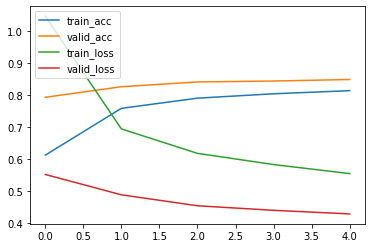

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_acc','valid_acc','train_loss','valid_loss'],loc='upper left')
plt.show()

In [ ]:
results=model.evaluate(X_test,y_test)
print("Accuracy = {}%".format(results[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.4581 - accuracy: 0.8376
Accuracy = 83.75999927520752%


In [ ]:
callback=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5)
history=model.fit(X_train, y_train, batch_size = 32,validation_split=0.3,epochs = 5,callbacks=[callback] ,verbose = 1)

Epoch 1/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5339 - accuracy: 0.8241 - val_loss: 0.4208 - val_accuracy: 0.8506
Epoch 2/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5194 - accuracy: 0.8288 - val_loss: 0.4149 - val_accuracy: 0.8548
Epoch 3/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5072 - accuracy: 0.8331 - val_loss: 0.4104 - val_accuracy: 0.8571
Epoch 4/5
1313/1313 [==============================] - 6s 4ms/step - loss: 0.4901 - accuracy: 0.8358 - val_loss: 0.4072 - val_accuracy: 0.8563
Epoch 5/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4788 - accuracy: 0.8412 - val_loss: 0.4001 - val_accuracy: 0.8594


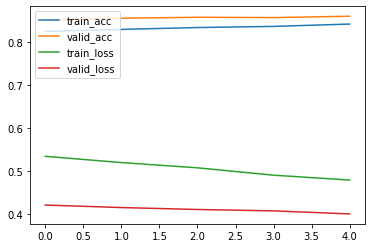

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_acc','valid_acc','train_loss','valid_loss'],loc='upper left')
plt.show()

In [ ]:
results=model.evaluate(X_test,y_test)
print("Accuracy = {}%".format(results[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.4297 - accuracy: 0.8476
Accuracy = 84.7599983215332%


#ENSEMBLING

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
y_train=np.argmax(y_train,axis=1)
y_test=np.argmax(y_test,axis=1)

In [ ]:
def cal1():
    model=Sequential()
    model.add(Dense(50, input_shape = (784,)))  
    model.add(Activation('relu')) 

    model.add(Dense(50))                      
    model.add(Activation('relu'))

    model.add(Dense(50))                          
    model.add(Activation('relu'))

    model.add(Dense(50))                      
    model.add(Activation('relu'))

    model.add(Dense(50))                          
    model.add(Activation('relu'))
    
    model.add(Dense(10))                         
    model.add(Activation('softmax')) 
    sgd = optimizers.Adagrad(learning_rate = 0.01)    # stochastic gradient descent optimizer
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
m1=KerasClassifier(build_fn=cal1,epochs=5,verbose=0)
m2=KerasClassifier(build_fn=cal1,epochs=5,verbose=0)
m3=KerasClassifier(build_fn=cal1,epochs=5,verbose=0)
m1._estimator_type='classifier'
m2._estimator_type='classifier'
m3._estimator_type='classifier'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
ensemble_clf=VotingClassifier(estimators=[('m1',m1),('m2',m2),('m3',m3),],voting='soft')
history=ensemble_clf.fit(X_train,y_train)
y_pred=ensemble_clf.predict(X_test)
print("Accuracy = {}%".format(accuracy_score(y_pred,y_test)))

Accuracy = 0.8789%


#Checkpoint in keras

In [ ]:
pip install h5py

In [ ]:
from tensorflow.python.keras.callbacks import ModelCheckpoint
ch=ModelCheckpoint('model.h5py',monitor='val_loss',mode='min',save_best_only=True)

In [ ]:
#from keras.model import load_model
final_model=tf.keras.models.load_model('model.h5py')

#INFERENCE
ACCUARCY OF:
1.   basic mlp model = 10.00%
2.   with best initializer he_normal = 32%
3.   non-linear activation function(relu) = 85%
4.   with Adagrad optimizer = 86%
5.   BatchNormalization = 85%
6.   DropOut(regularization) = 83%
7.   early stopping with patience 3 = 83.7% and with patience 5 = 84.7%
8.   ensembling = 87.89%
*   THUS ACCURACY IS HIGH AFTER APPLYING Ensembling for this model.










